In [9]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, seasonal_decompose
from sklearn.metrics import mean_squared_error

from statsmodels.tools.eval_measures import mse

import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv(r'data/final_data2.csv')
df

,DATE,MIN_TEMPR,ELECTRIC_PROD,BEER_PROD
0,1985-01-01,20.7,72.5052,93.2
1,1985-02-01,17.9,70.6720,96.0
2,1985-03-01,18.8,62.4502,95.2
3,1985-04-01,14.6,57.4714,77.1
4,1985-05-01,15.8,55.3151,70.9
...,...,...,...,...
392,2017-09-01,12.5,98.6154,145.1
393,2017-10-01,17.0,93.6137,183.7
394,2017-11-01,17.1,97.3359,210.5
395,2017-12-01,14.0,114.7212,203.3


In [27]:
#df.set_index('DATE', inplace=True)

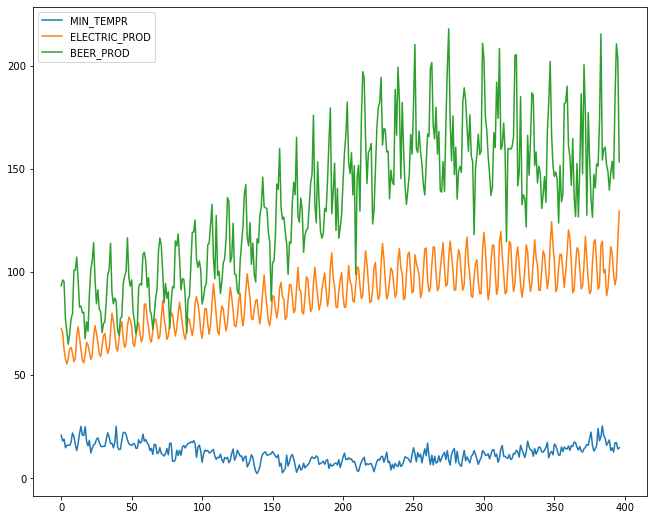

In [28]:
df.plot();

In [29]:
data = []
for i in df.columns:
    data.append(go.Scatter(
            x = df.index, y = df[i], name=i
            ))
    
data = data
layout = {'title': 'Data1'}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [30]:
train_df, test_df = df.iloc[:round(len(df)*0.8), :], df.iloc[round(len(df)*0.8): , :]

In [31]:
train_df

,DATE,MIN_TEMPR,ELECTRIC_PROD,BEER_PROD
0,1985-01-01,20.7,72.5052,93.2
1,1985-02-01,17.9,70.6720,96.0
2,1985-03-01,18.8,62.4502,95.2
3,1985-04-01,14.6,57.4714,77.1
4,1985-05-01,15.8,55.3151,70.9
...,...,...,...,...
313,2011-02-01,15.7,107.3753,161.1
314,2011-03-01,10.5,99.1028,172.1
315,2011-04-01,10.5,89.3583,158.4
316,2011-05-01,9.7,90.0698,114.6


In [33]:
test_df

,DATE,MIN_TEMPR,ELECTRIC_PROD,BEER_PROD
318,2011-07-01,11.3,114.7068,159.7
319,2011-08-01,8.9,113.5958,159.4
320,2011-09-01,9.4,99.4712,160.7
321,2011-10-01,11.9,90.3566,165.5
322,2011-11-01,11.7,93.8095,205.0
...,...,...,...,...
392,2017-09-01,12.5,98.6154,145.1
393,2017-10-01,17.0,93.6137,183.7
394,2017-11-01,17.1,97.3359,210.5
395,2017-12-01,14.0,114.7212,203.3


In [34]:
df1_train, df1_test = train_df[['DATE']+['ELECTRIC_PROD']], test_df[['DATE']+['ELECTRIC_PROD']]

In [35]:
df1_train.set_index('DATE', inplace=True), df1_test.set_index('DATE', inplace=True)

(None, None)

In [36]:
df1_test

,ELECTRIC_PROD
DATE,
2011-07-01,114.7068
2011-08-01,113.5958
2011-09-01,99.4712
2011-10-01,90.3566
2011-11-01,93.8095
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [37]:
trace0 = go.Scatter(
            x = df1_train.index, y = df1_train['ELECTRIC_PROD'], name='ELECTRIC_PROD_TRAIN'
            )

trace1 = go.Scatter(
            x = df1_test.index, y = df1_test['ELECTRIC_PROD'], name='ELECTRIC_PROD_TEST'
            )

data = [trace0,  trace1]
layout = {'title': 'Data1'}
    
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [38]:
df1_test.index

Index(['2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
       '2011-12-01', '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
       '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01',
       '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
       '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
       '2013-08-01', '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
       '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
       '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
       '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
       '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',

In [39]:
df_temp = df[['DATE'] + ['ELECTRIC_PROD']]

In [40]:
df_temp

,DATE,ELECTRIC_PROD
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [41]:
df_temp['DATE'] = pd.to_datetime(df_temp['DATE']) 

In [42]:
df_temp.set_index('DATE', inplace=True)

In [43]:
df_temp.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

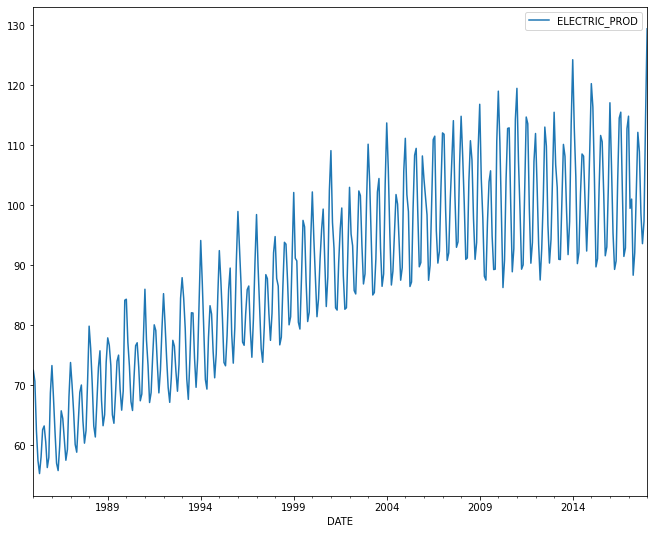

In [44]:
df_temp.plot();

In [45]:
def exp_smoothing(df, alpha):
    df_ex = df.ewm(alpha=alpha, adjust=True).mean().dropna()

    return df_ex

In [46]:
df_temp_smooth = exp_smoothing(df_temp, 0.2)

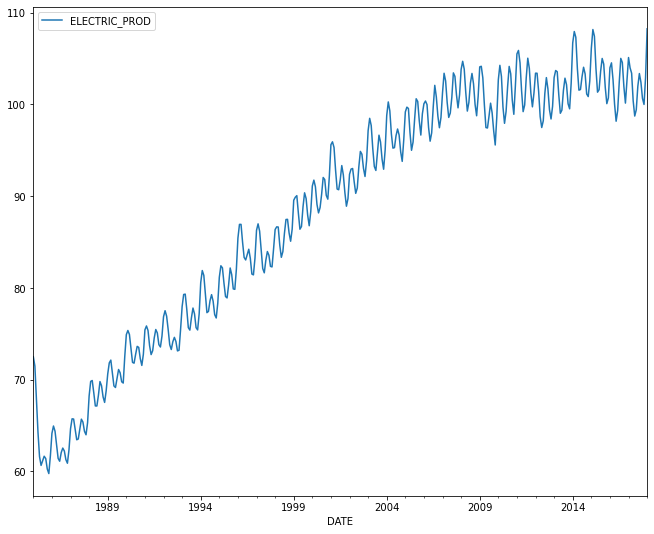

In [47]:
df_temp_smooth.plot();

In [48]:
df_temp_smooth.index.freq ='MS'

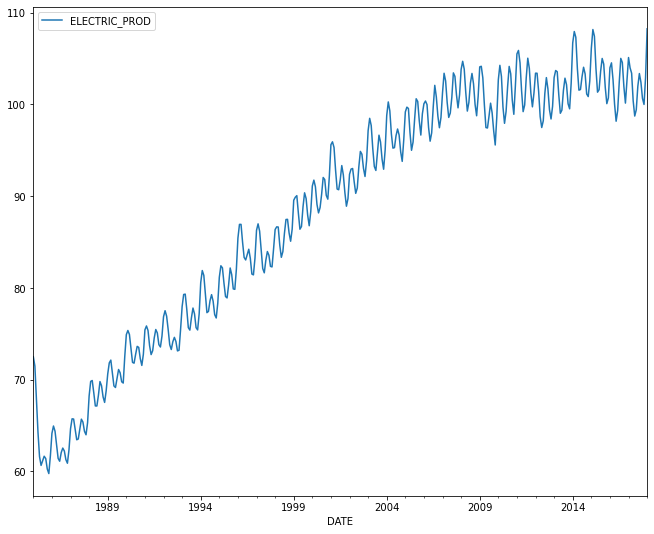

In [49]:
df_temp_smooth.plot()
plt.show()

In [50]:
df_temp_train, df_temp_test = df_temp_smooth.iloc[:round(len(df)*0.9), :], df_temp_smooth.iloc[round(len(df)*0.9): , :]

In [51]:
df_temp_train

,ELECTRIC_PROD
DATE,
1985-01-01,72.505200
1985-02-01,71.486756
1985-03-01,67.783249
1985-04-01,64.290075
1985-05-01,61.620223
...,...
2014-05-01,101.542618
2014-06-01,101.609694
2014-07-01,102.997696


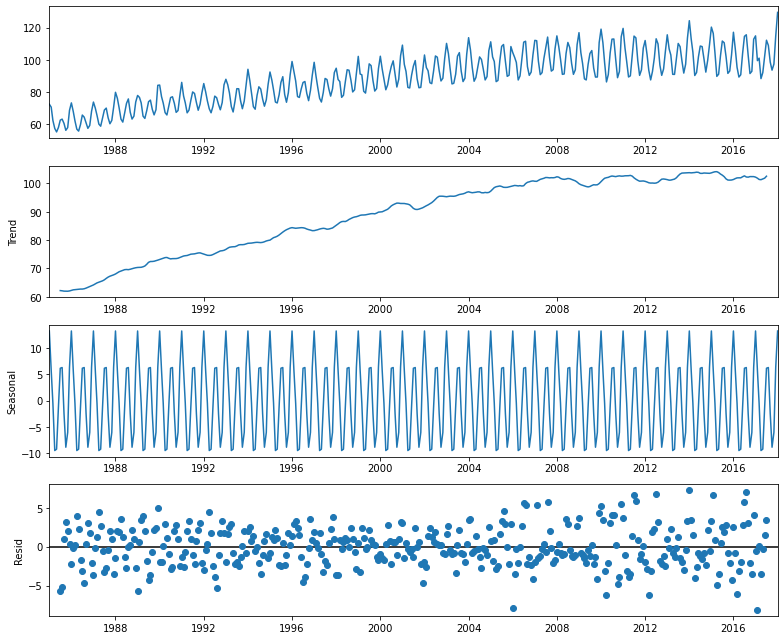

In [52]:
decomposition = seasonal_decompose(df_temp, model='additive')
fig = decomposition.plot()

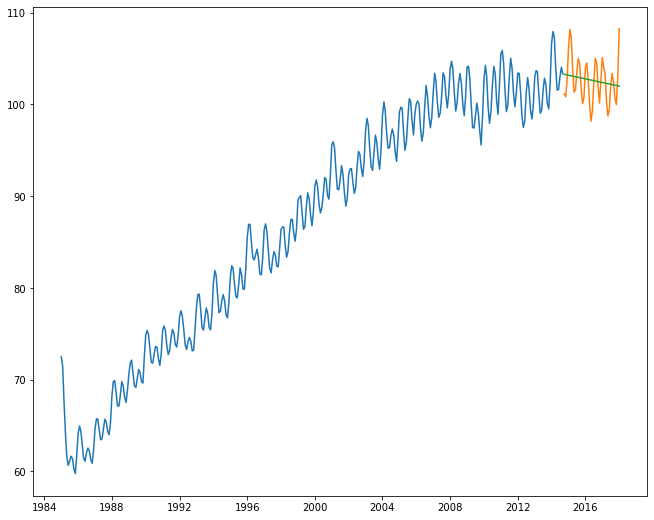

In [53]:
y_holt = df_temp_test.copy()

model = Holt(df_temp_train['ELECTRIC_PROD']).fit(smoothing_level=0.55, smoothing_trend=0.2)
pred = model.predict(start = df_temp_test.index[0], end = df_temp_test.index[-1])

plt.plot(df_temp_train.index, df_temp_train, label='train')
plt.plot(df_temp_test.index, df_temp_test, label='test')
plt.plot(pred.index, pred, label='predict')
plt.show()

In [198]:
thresh_params = np.arange(0, 1, 0.05)
mse_arr = []
param_arr = []

for i in thresh_params:
    for j in thresh_params:
        model = Holt(df_temp_train['ELECTRIC_PROD']).fit(smoothing_level=i, smoothing_trend=j)
        pred = model.predict(start = df_temp_test.index[0], end = df_temp_test.index[-1])
        mse_arr.append(np.sqrt(mse(pred, df_temp_test['ELECTRIC_PROD'], axis=0)))
        param_arr.append('{}, {}'.format(i, j))





In [207]:
param_arr[mse_arr.index(np.amin(mse_arr))]

'0.55, 0.2'

In [201]:
param_arr

['0.0, 0.0',
 '0.0, 0.05',
 '0.0, 0.1',
 '0.0, 0.15000000000000002',
 '0.0, 0.2',
 '0.0, 0.25',
 '0.0, 0.30000000000000004',
 '0.0, 0.35000000000000003',
 '0.0, 0.4',
 '0.0, 0.45',
 '0.0, 0.5',
 '0.0, 0.55',
 '0.0, 0.6000000000000001',
 '0.0, 0.65',
 '0.0, 0.7000000000000001',
 '0.0, 0.75',
 '0.0, 0.8',
 '0.0, 0.8500000000000001',
 '0.0, 0.9',
 '0.0, 0.9500000000000001',
 '0.05, 0.0',
 '0.05, 0.05',
 '0.05, 0.1',
 '0.05, 0.15000000000000002',
 '0.05, 0.2',
 '0.05, 0.25',
 '0.05, 0.30000000000000004',
 '0.05, 0.35000000000000003',
 '0.05, 0.4',
 '0.05, 0.45',
 '0.05, 0.5',
 '0.05, 0.55',
 '0.05, 0.6000000000000001',
 '0.05, 0.65',
 '0.05, 0.7000000000000001',
 '0.05, 0.75',
 '0.05, 0.8',
 '0.05, 0.8500000000000001',
 '0.05, 0.9',
 '0.05, 0.9500000000000001',
 '0.1, 0.0',
 '0.1, 0.05',
 '0.1, 0.1',
 '0.1, 0.15000000000000002',
 '0.1, 0.2',
 '0.1, 0.25',
 '0.1, 0.30000000000000004',
 '0.1, 0.35000000000000003',
 '0.1, 0.4',
 '0.1, 0.45',
 '0.1, 0.5',
 '0.1, 0.55',
 '0.1, 0.600000000000000

In [204]:
mse_arr.index(np.amin(mse_arr))

224

In [205]:
param_arr[224]

'0.55, 0.2'

In [189]:
a1 = np.arange(0, 3, 0.2)
a2 = np.arange(1, 7, 0.4)

mse(a1, a2, axis=0)

6.506666666666662

In [197]:
model = Holt(df_temp_train['ELECTRIC_PROD']).fit(smoothing_level=0.3, smoothing_trend=0.4)
pred = model.predict(start = df_temp_test.index[0], end = df_temp_test.index[-1])
np.sqrt(mse(pred, df_temp_test['ELECTRIC_PROD'], axis=0))

8.478360643806948

In [193]:
pred

2014-10-01    102.886446
2014-11-01    102.507332
2014-12-01    102.128219
2015-01-01    101.749105
2015-02-01    101.369991
2015-03-01    100.990877
2015-04-01    100.611763
2015-05-01    100.232649
2015-06-01     99.853535
2015-07-01     99.474421
2015-08-01     99.095308
2015-09-01     98.716194
2015-10-01     98.337080
2015-11-01     97.957966
2015-12-01     97.578852
2016-01-01     97.199738
2016-02-01     96.820624
2016-03-01     96.441511
2016-04-01     96.062397
2016-05-01     95.683283
2016-06-01     95.304169
2016-07-01     94.925055
2016-08-01     94.545941
2016-09-01     94.166827
2016-10-01     93.787714
2016-11-01     93.408600
2016-12-01     93.029486
2017-01-01     92.650372
2017-02-01     92.271258
2017-03-01     91.892144
2017-04-01     91.513030
2017-05-01     91.133917
2017-06-01     90.754803
2017-07-01     90.375689
2017-08-01     89.996575
2017-09-01     89.617461
2017-10-01     89.238347
2017-11-01     88.859233
2017-12-01     88.480119
2018-01-01     88.101006


In [194]:
df_temp_test

,ELECTRIC_PROD
DATE,
2014-10-01,101.127144
2014-11-01,100.842375
2014-12-01,102.543440
2015-01-01,106.088672
2015-02-01,108.146698
2015-03-01,107.411478
2015-04-01,103.878403
2015-05-01,101.321322
2015-06-01,101.586958


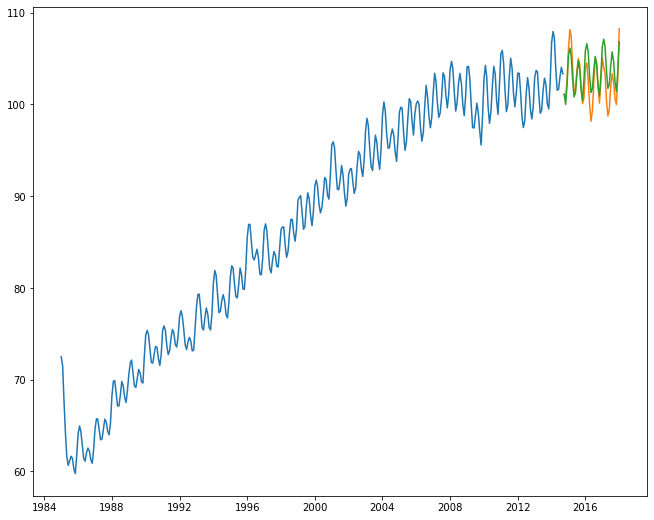

In [54]:
model = ExponentialSmoothing(df_temp_train, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit(optimized=True, use_brute=True)
#pred = model.predict(start = df_temp_test.index[0], end = df_temp_test.index[-1])
pred = model.predict(start = df_temp_test.index[0], end = df_temp_test.index[-1])

plt.plot(df_temp_train.index, df_temp_train, label='train')
plt.plot(df_temp_test.index, df_temp_test, label='test')
plt.plot(pred.index, pred, label='predict')
plt.show()